##### PROJETO INTEGRADOR  |  PREVISÃO DE DEMANDA  |   VENDAS AUTOPEÇAS (GRUPO 100 VIES)


# IMPORTANDO BIBLIOTECAS

In [150]:
#IMPORTANDO BIBLIOTECAS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import os
import janitor


from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
#from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', None)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [29]:
import plotly_express as px

# IMPORTANDO O .CSV DE VENDAS

In [187]:
vendastelepweek=pd.read_csv("4-VendasTelepWeek-Rev3.csv",sep=',',encoding='Latin1')
vendastelepweek.head()

,Codigo,0,1,2,3,4,5,6,7,8,...,99,100,101,102,103,104,105,106,107,108
0,1,0,0,0,0,0,2,2,4,2,...,9,10,8,8,10,0,6,10,6,2
1,2,0,0,0,0,0,0,0,4,2,...,5,8,2,6,10,0,4,6,4,8
2,3,0,0,0,0,0,0,0,0,0,...,5,0,0,4,4,0,0,10,6,2
3,4,0,0,0,0,0,0,0,0,0,...,2,0,0,0,4,0,0,4,6,0
4,5,0,0,0,0,0,0,5,0,2,...,13,25,30,6,0,0,0,17,10,0


# EXPLORANDO O DATASET

In [188]:
vendastelepweek = pd.read_csv(r'4-VendasTelepWeek-Rev3.csv')
melt = vendastelepweek.melt(id_vars='Codigo', var_name='Week',value_name='Vendas')
melt = melt.sort_values(['Week','Codigo']).reset_index(drop=True)
melt['Week'] = melt['Week'].astype(int)

import plotly.express as px
x=(melt2.groupby(['Week']))['Week'].nunique().index
y=pd.DataFrame(melt2.groupby(['Week'])['Vendas'].sum())
fig = px.line(melt2, x=x, y=y,title="Unidades Vendidas/Semana")
print(y.shape)
fig.show()

(107, 1)


# FEATURE ENGINEER 1: Lag( ) + Diff( ) + Dummies (Meses)

In [217]:
melt2 = melt.copy()
melt2['VendasLastWeek'] = melt2.groupby(['Codigo'])['Vendas'].shift()
melt2['DiffVendasLastWeek'] = melt2.groupby(['Codigo'])['VendasLastWeek'].diff()
melt2 = melt2.dropna().reset_index(drop=True)
melt2 = melt2.sort_values(['Week','Codigo']).reset_index(drop=True)

melt2['Week'] = melt2['Week'].astype(int)
melt2['VendasLastWeek'] = melt2['VendasLastWeek'].astype(int)
melt2['DiffVendasLastWeek'] = melt2['DiffVendasLastWeek'].astype(int)

melt2.head()
melt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20437 entries, 0 to 20436
Data columns (total 5 columns):
Codigo                20437 non-null int64
Week                  20437 non-null int64
Vendas                20437 non-null int64
VendasLastWeek        20437 non-null int64
DiffVendasLastWeek    20437 non-null int64
dtypes: int64(5)
memory usage: 798.4 KB


In [218]:
Jan = []
for w in melt2['Week']:
    if (w<=4) or (w>=52 and w<=56)or (w>=104):
        jan = 1
    else:
        jan = 0
    Jan.append(jan)
melt2['Jan'] = Jan

Fev = []
for w in melt2['Week']:
    if (w>=5 and w<=8) or (w>=57 and w<=60):
        fev = 1
    else:
        fev = 0
    Fev.append(fev)
melt2['Fev'] = Fev


Mar = []
for w in melt2['Week']:
    if (w>=9 and w<=12) or (w>=61 and w<=64):
        mar = 1
    else:
        mar = 0
    Mar.append(mar)
melt2['Mar'] = Mar


Abr = []
for w in melt2['Week']:
    if (w>=13 and w<=17) or (w>=65 and w<=69):
        abr = 1
    else:
        abr = 0
    Abr.append(abr)
melt2['Abr'] = Abr


Mai = []
for w in melt2['Week']:
    if (w>=18 and w<=21) or (w>=70 and w<=73):
        mai = 1
    else:
        mai = 0
    Mai.append(mai)
melt2['Mai'] = Mai


Jun = []
for w in melt2['Week']:
    if (w>=22 and w<=25) or (w>=74 and w<=77):
        jun = 1
    else:
        jun = 0
    Jun.append(jun)
melt2['Jun'] = Jun


Jul = []
for w in melt2['Week']:
    if (w>=26 and w<=30) or (w>=78 and w<=82):
        jul = 1
    else:
        jul = 0
    Jul.append(jul)
melt2['Jul'] = Jul


Ago = []
for w in melt2['Week']:
    if (w>=31 and w<=34) or (w>=83 and w<=86):
        ago = 1
    else:
        ago = 0
    Ago.append(ago)
melt2['Ago'] = Ago


Set = []
for w in melt2['Week']:
    if (w>=35 and w<=38) or (w>=87 and w<=91):
        set = 1
    else:
        set = 0
    Set.append(set)
melt2['Set'] = Set

Out = []
for w in melt2['Week']:
    if (w>=39 and w<=43) or (w>=92 and w<=95):
        out = 1
    else:
        out = 0
    Out.append(out)
melt2['Out'] = Out


Nov = []
for w in melt2['Week']:
    if (w>=44 and w<=47) or (w>=96 and w<=99):
        nov = 1
    else:
        nov = 0
    Nov.append(nov)
melt2['Nov'] = Nov

Dez = []
for w in melt2['Week']:
    if (w>=48 and w<=52) or (w>=100 and w<=104):
        dez = 1
    else:
        dez = 0
    Dez.append(dez)
melt2['Dez'] = Dez

melt2.head()

,Codigo,Week,Vendas,VendasLastWeek,DiffVendasLastWeek,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,-6,1,0,0,0,0,0,0,0,0,0,0,0


# BASELINE:     LAST WEEK 
RMSLE = 0.81424

In [219]:
def rmsle (ytrue,ypred):
    return np.sqrt(mean_squared_log_error(ytrue,ypred))


In [220]:
mean_error = []
for week in range(92,104):                #31/12/2019 - 12 semanas
    train = melt2[melt2['Week'] < week]
    val = melt2[melt2['Week'] == week]
    
    p = val['VendasLastWeek'].values
    
    error = rmsle(val['Vendas'].values, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 92 - Error 0.86043
Week 93 - Error 0.68751
Week 94 - Error 0.68956
Week 95 - Error 0.79837
Week 96 - Error 0.78220
Week 97 - Error 0.86472
Week 98 - Error 0.73761
Week 99 - Error 0.75886
Week 100 - Error 0.84305
Week 101 - Error 0.93477
Week 102 - Error 0.96663
Week 103 - Error 0.84719
Mean Error = 0.81424


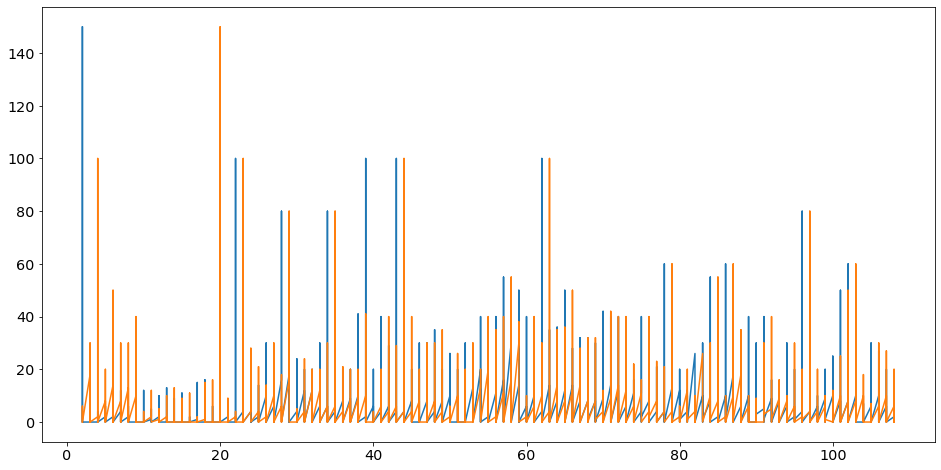

In [232]:
xt = melt2.Week
yt = melt2.Vendas
yp = melt2.VendasLastWeek

plt.plot('Week','Vendas', data = melt2)
plt.plot('Week','VendasLastWeek',data = melt2)

(0, 100)

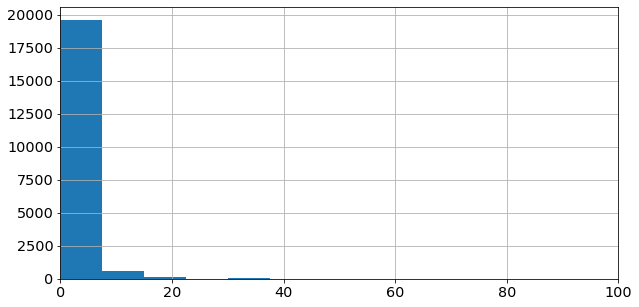

In [171]:
melt2['Vendas'].hist(bins=20, figsize=(10,5))
plt.xlim([0,100])

# MODELO 1: RANDOM FOREST REGRESSOR 
RMSLE = 0,77702.  Melhorou em comparação à Baseline

In [237]:
mean_error = []
for week in range(92,104):
    train = melt2[melt2['Week'] < week]
    val = melt2[melt2['Week'] == week]
    
    xtr, xts = train.drop(['Vendas'], axis=1), val.drop(['Vendas'], axis=1)
    ytr, yts = train['Vendas'].values, val['Vendas'].values
    
    mdl = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 92 - Error 0.89310
Week 93 - Error 0.72495
Week 94 - Error 0.67281
Week 95 - Error 0.75796
Week 96 - Error 0.75611
Week 97 - Error 0.78214
Week 98 - Error 0.65727
Week 99 - Error 0.77448
Week 100 - Error 0.79302
Week 101 - Error 0.76018
Week 102 - Error 0.85548
Week 103 - Error 0.89678
Mean Error = 0.77702


# FEATURE ENGINEER 2: Lag(1) + Diff(1)   |   MODELO 2: RFR
RMSLE = 0.77511. Redução insignificante em relação ao modelo anterior

In [113]:
melt3 = melt.copy()
melt3['VendasLastWeek'] = melt3.groupby(['Codigo'])['Vendas'].shift()
melt3['VendasLastWeek_Diff'] = melt3.groupby(['Codigo'])['VendasLastWeek'].diff()
melt3['VendasLastWeek-1'] = melt3.groupby(['Codigo'])['Vendas'].shift(2)
melt3['VendasLastWeek-1_Diff'] = melt3.groupby(['Codigo'])['VendasLastWeek-1'].diff()
melt3 = melt3.dropna()
melt3.head()

,Codigo,Week,Vendas,VendasLastWeek,VendasLastWeek_Diff,VendasLastWeek-1,VendasLastWeek-1_Diff
573,1,100,10,0.0,0.0,0.0,0.0
574,2,100,8,0.0,0.0,0.0,0.0
575,3,100,0,0.0,0.0,0.0,0.0
576,4,100,0,0.0,0.0,0.0,0.0
577,5,100,25,12.0,12.0,0.0,0.0


In [239]:
mean_error = []
for week in range(92,104):
    train = melt3[melt3['Week'] < week]
    val = melt3[melt3['Week'] == week]
    
    xtr, xts = train.drop(['Vendas'], axis=1), val.drop(['Vendas'], axis=1)
    ytr, yts = train['Vendas'].values, val['Vendas'].values
    
    mdl = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 92 - Error 0.86149
Week 93 - Error 0.74593
Week 94 - Error 0.71192
Week 95 - Error 0.77525
Week 96 - Error 0.68809
Week 97 - Error 0.81763
Week 98 - Error 0.70424
Week 99 - Error 0.73001
Week 100 - Error 0.80544
Week 101 - Error 0.75848
Week 102 - Error 0.88064
Week 103 - Error 0.82215
Mean Error = 0.77511


# FEATURE ENGINEER 3: Lag(2) + Diff(2) | MODELO 2: RFR
RMSLE = 0.77082. Sem alteração significativa...

In [240]:
melt4 = melt.copy()
melt4['VendasLastWeek'] = melt4.groupby(['Codigo'])['Vendas'].shift()
melt4['VendasLastWeek_Diff'] = melt4.groupby(['Codigo'])['VendasLastWeek'].diff()
melt4['VendasLastWeek-1'] = melt4.groupby(['Codigo'])['Vendas'].shift(2)
melt4['VendasLastWeek-1_Diff'] = melt4.groupby(['Codigo'])['VendasLastWeek-1'].diff()
melt4['VendasLastWeek-2'] = melt4.groupby(['Codigo'])['Vendas'].shift(3)
melt4['VendasLastWeek-2_Diff'] = melt4.groupby(['Codigo'])['VendasLastWeek-2'].diff()
melt4 = melt4.dropna()
melt4.head()

,Codigo,Week,Vendas,VendasLastWeek,VendasLastWeek_Diff,VendasLastWeek-1,VendasLastWeek-1_Diff,VendasLastWeek-2,VendasLastWeek-2_Diff
764,1,101,8,10.0,10.0,0.0,0.0,0.0,0.0
765,2,101,2,8.0,8.0,0.0,0.0,0.0,0.0
766,3,101,0,0.0,0.0,0.0,0.0,0.0,0.0
767,4,101,0,0.0,0.0,0.0,0.0,0.0,0.0
768,5,101,30,25.0,13.0,12.0,12.0,0.0,0.0


In [242]:
mean_error = []
for week in range(92,100):
    train = melt4[melt4['Week'] < week]
    val = melt4[melt4['Week'] == week]
    
    xtr, xts = train.drop(['Vendas'], axis=1), val.drop(['Vendas'], axis=1)
    ytr, yts = train['Vendas'].values, val['Vendas'].values
    
    mdl = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 92 - Error 0.89493
Week 93 - Error 0.79269
Week 94 - Error 0.70625
Week 95 - Error 0.76175
Week 96 - Error 0.70797
Week 97 - Error 0.83033
Week 98 - Error 0.72816
Week 99 - Error 0.74448
Mean Error = 0.77082


# APLICANDO LOG NA VARIÁVEL TARGET

RMSLE = 0.66903  - Melhora significativa em comparação ao modelo anterior

By taking the log of the target we get the added bonus that its distribution will look closer to a normal distribution. This usually helps the model learn better.

In [244]:
for week in range(92,100):
    train = melt4[melt4['Week'] < week]
    val = melt4[melt4['Week'] == week]
    
    xtr, xts = train.drop(['Vendas'], axis=1), val.drop(['Vendas'], axis=1)
    ytr, yts = train['Vendas'].values, val['Vendas'].values
    
    mdl = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 92 - Error 0.60774
Week 93 - Error 0.57557
Week 94 - Error 0.56604
Week 95 - Error 0.62219
Week 96 - Error 0.63319
Week 97 - Error 0.68753
Week 98 - Error 0.57334
Week 99 - Error 0.67948
Mean Error = 0.66903


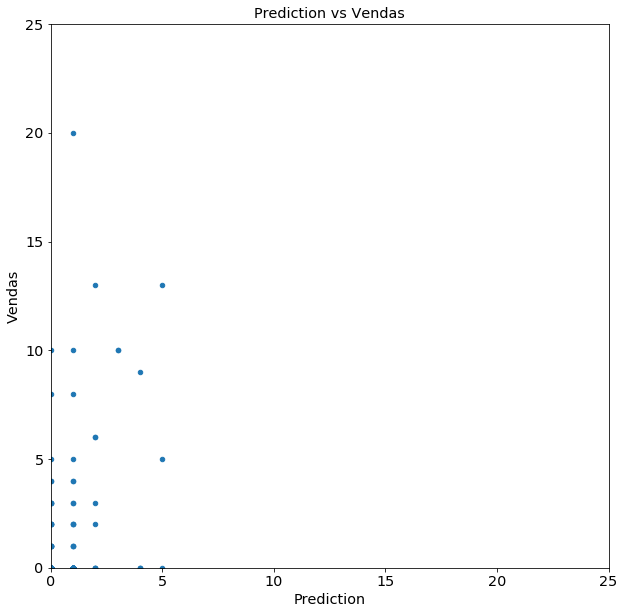

In [248]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y='Vendas', figsize=(10,10), title='Prediction vs Vendas', 
                 ylim=(0,25), xlim=(0,25))

# TUNING DE HIPER PARAMETROS DA RFR
RMSLE = 0.65627 - Melhora razoável em comparação ao modelo anterior

## n_estimators = 1000
RMSLE = 0.65627 - Melhora significativa em comparação ao modelo anterior

In [249]:
for week in range(92,100):
    train = melt4[melt4['Week'] < week]
    val = melt4[melt4['Week'] == week]
    
    xtr, xts = train.drop(['Vendas'], axis=1), val.drop(['Vendas'], axis=1)
    ytr, yts = train['Vendas'].values, val['Vendas'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 92 - Error 0.61075
Week 93 - Error 0.57596
Week 94 - Error 0.56563
Week 95 - Error 0.62286
Week 96 - Error 0.63351
Week 97 - Error 0.68452
Week 98 - Error 0.57227
Week 99 - Error 0.67856
Mean Error = 0.65627


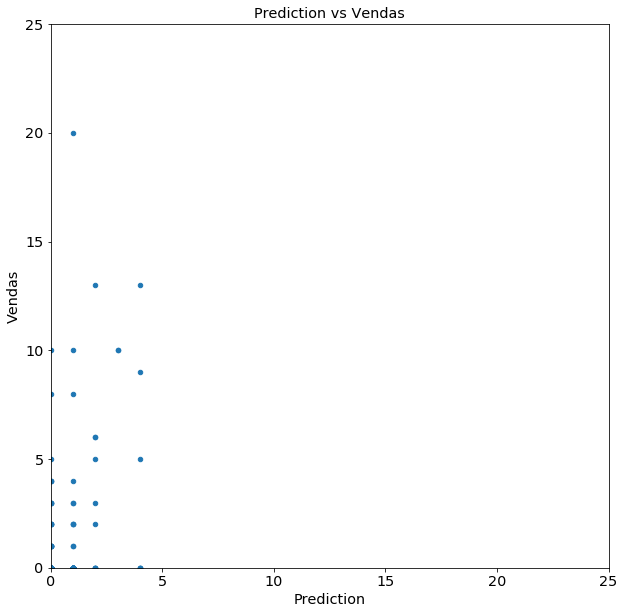

In [251]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y='Vendas', figsize=(10,10), title='Prediction vs Vendas', 
                 ylim=(0,25), xlim=(0,25))

# FEATURE IMPORTANCE - RANDOM FOREST REGRESSOR

In [252]:
import pandas as pd
feature_importances = pd.DataFrame(mdl.feature_importances_,
                           index = xtr.columns,
                           columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Codigo,0.388184
Week,0.308871
VendasLastWeek-2_Diff,0.081361
VendasLastWeek_Diff,0.056932
VendasLastWeek-1_Diff,0.048567
VendasLastWeek,0.043170
VendasLastWeek-2,0.041869
VendasLastWeek-1,0.031047


# MODELO LGBM
RMSLE = 0.65746. Sem alteração significativa...

In [258]:
mean_error = []
for week in range(82,94):
    train = melt4[melt4['Week'] < week]
    val = melt4[melt4['Week'] == week]
    
    xtr, xts = train.drop(['Vendas'], axis=1), val.drop(['Vendas'], axis=1)
    ytr, yts = train['Vendas'].values, val['Vendas'].values
    
    mdl = LGBMRegressor(n_estimators=500, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 82 - Error 0.73021
Week 83 - Error 0.67316
Week 84 - Error 0.66676
Week 85 - Error 0.59043
Week 86 - Error 0.64082
Week 87 - Error 0.75972
Week 88 - Error 0.57150
Week 89 - Error 0.80329
Week 90 - Error 0.73456
Week 91 - Error 0.70161
Week 92 - Error 0.51688
Week 93 - Error 0.50054
Mean Error = 0.65746


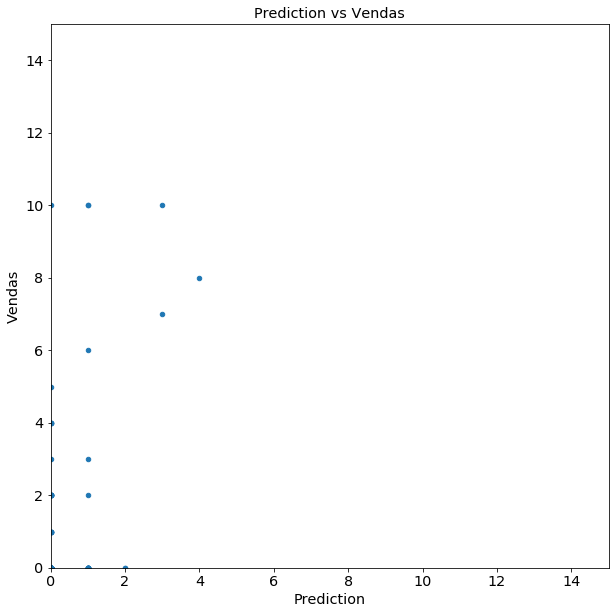

In [260]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y='Vendas', figsize=(10,10), title='Prediction vs Vendas', 
                 ylim=(0,15), xlim=(0,15))